# Convolutional Neural Networks

## 1. What are Convolutional Neural Networks

Convolutional neural networks are composed of multiple layers of artificial neurons. Artificial neurons, a rough imitation of their biological counterparts, are mathematical functions that calculate the weighted sum of multiple inputs and outputs an activation value. When you input an image in a ConvNet, each layer generates several activation functions that are passed on to the next layer.

The first layer usually extracts basic features such as horizontal or diagonal edges. This output is passed on to the next layer which detects more complex features such as corners or combinational edges. As we move deeper into the network it can identify even more complex features such as objects, faces, etc.

Based on the activation map of the final convolution layer, the classification layer outputs a set of confidence scores (values between 0 and 1) that specify how likely the image is to belong to a “class.” For instance, if you have a ConvNet that detects cats, dogs, and horses, the output of the final layer is the possibility that the input image contains any of those animals.

## 2. Why CNNs were introduced when Fully connected ANNs were already there

There are several drawbacks of Fully connected ANN’s, especially when it comes to image processing. ANNs use one perceptron for each input (e.g. pixel in an image, multiplied by 3 in RGB case). The amount of weights rapidly becomes unmanageable for large images. For a 224 x 224 pixel image with 3 color channels there are around 150,000 weights that must be trained! As a result, difficulties arise whilst training and overfitting can occur.

Another common problem is that ANNs react differently to an input (images) and its shifted version — they are not translation invariant. For example, if a picture of a cat appears in the top left of the image in one picture and the bottom right of another picture, the ANN will try to correct itself and assume that a cat will always appear in this section of the image.

Clearly, ANNs are not the best idea to use for image processing. One of the main problems is that spatial information is lost when the image is flattened into an ANN. Nodes that are close together are important because they help to define the features of an image. We thus need a way to leverage the spatial correlation of the image features (pixels) in such a way that we can see the cat in our picture no matter where it may appear.

We know that ANNs:
- Do not scale well for images
- Ignore the information brought by pixel position and correlation with neighbors
- Cannot handle translations

The general idea of CNN’s is to intelligently adapt to the properties of images:
- Pixel position and neighborhood have semantic meanings
- Elements of interest can appear anywhere in the image

## 3. What is meant by the following terms: convolutional layer, pooling layer, padding, stride

##### Convolutional layer
Convolutional layers are the layers where filters are applied to the original image, or to other feature maps in a deep CNN. This is where most of the user-specified parameters are in the network. The most important parameters are the number of kernels and the size of the kernels.

##### Pooling layer
Pooling layer is responsible for reducing the spatial size of the Convolved Feature. This is to decrease the computational power required to process the data by reducing the dimensions. There are two types of pooling average pooling and max pooling.

So what we do in Max Pooling is we find the maximum value of a pixel from a portion of the image covered by the kernel. Max Pooling also performs as a Noise Suppressant. It discards the noisy activations altogether and also performs de-noising along with dimensionality reduction.

On the other hand, Average Pooling returns the average of all the values from the portion of the image covered by the Kernel. Average Pooling simply performs dimensionality reduction as a noise suppressing mechanism. Hence, we can say that Max Pooling performs a lot better than Average Pooling.

##### Padding
Padding essentially makes the feature maps produced by the filter kernels the same size as the original image. This is very useful for deep CNN’s as we don’t want the output to be reduced so that we only have a 2x2 region left at the end of the network upon which to predict our result.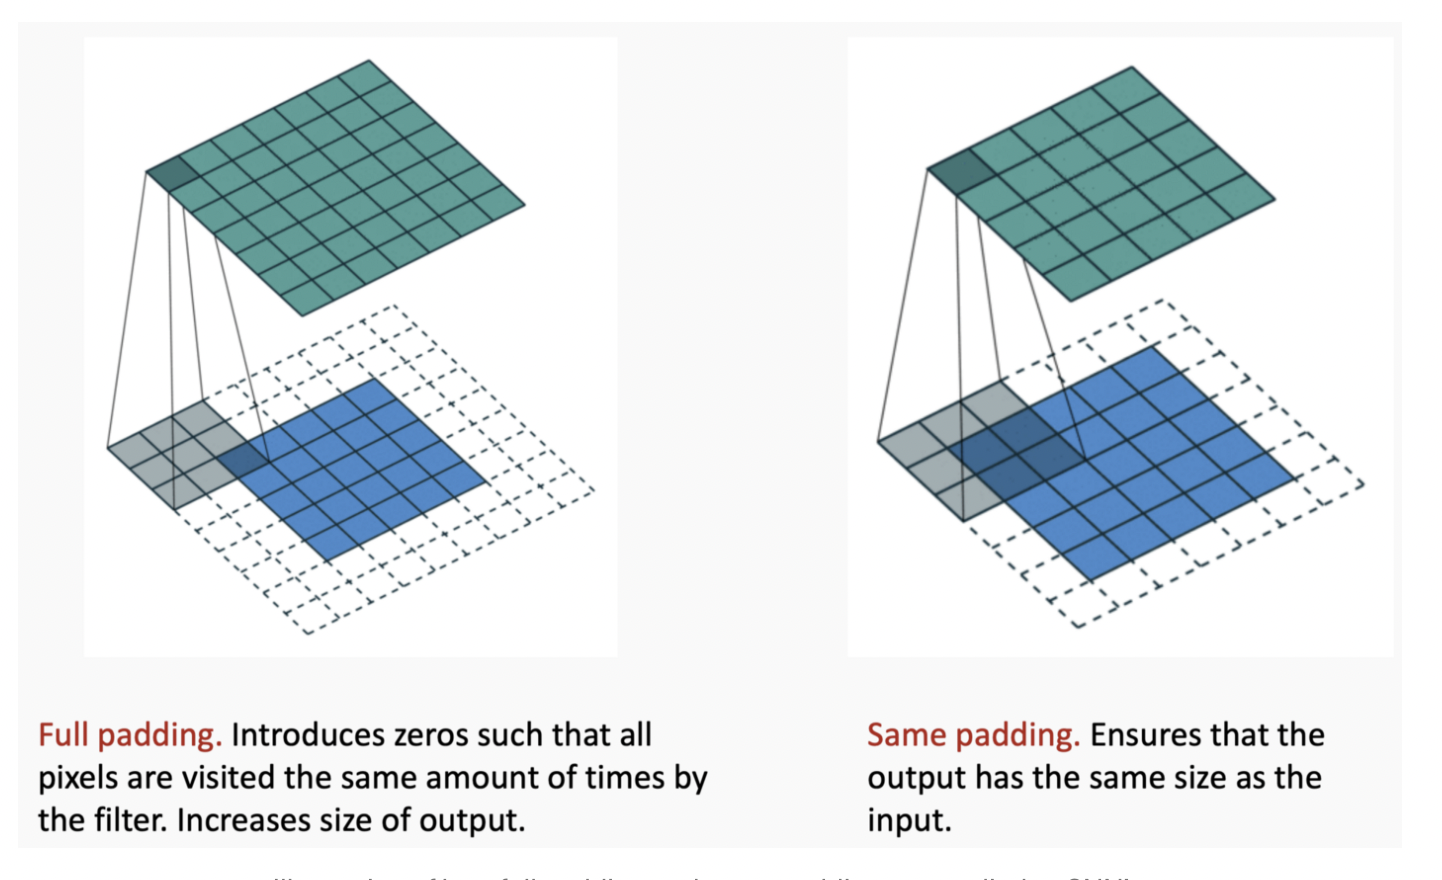

##### Stride
Stride is a parameter of the neural network's filter that modifies the amount of movement over the image or video. For example, if a neural network's stride is set to 1, the filter will move one pixel, or unit,  at a time. The size of the filter affects the encoded output volume, so stride is often set to a whole integer, rather than a fraction or decimal.


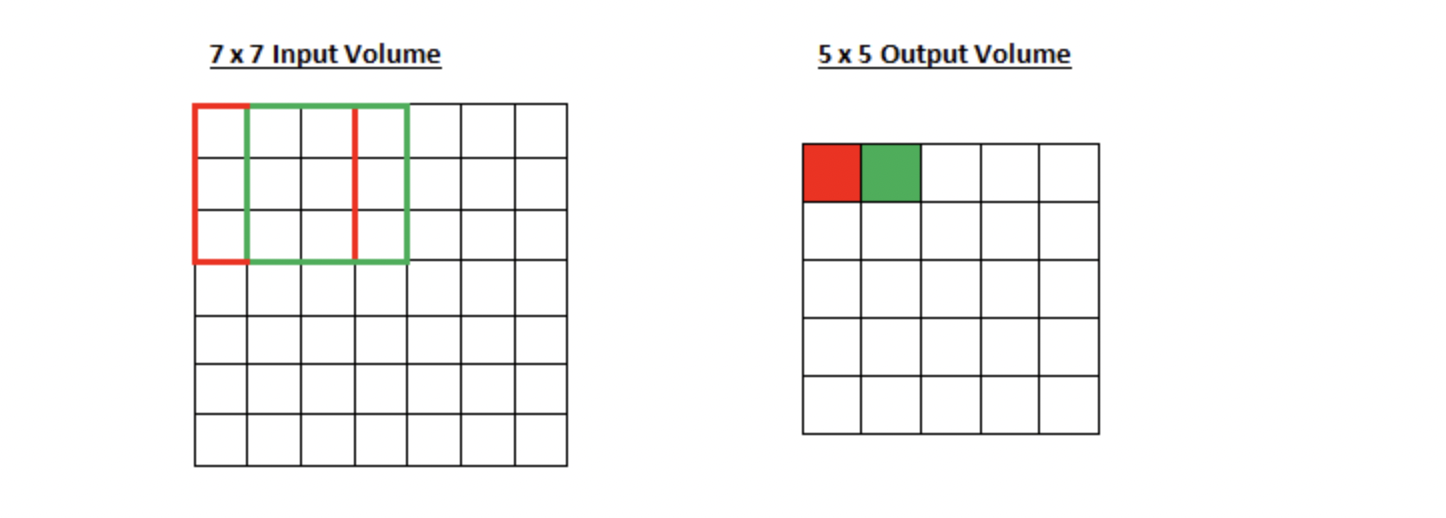

## 4. What would be the size of the output if input is n^2, filter is f^2 and stride is of s 

Output = (n - f) / s + 1

## 5. What are pre-trained models and what do you mean by transfer learning

A pre-trained model is a saved network that was previously trained on a large dataset, typically on a large-scale image-classification task. 

Transfer Learning is a machine learning method where we reuse a pre-trained model as the starting point for a model on a new task. To put it simply—a model trained on one task is repurposed on a second, related task as an optimization that allows rapid progress when modeling the second task.

## 6. Discuss CPU vs GPU vs TPU

##### CPU: Central Processing Unit.
Manage all the functions of a computer. It is the primary hardware of the computer that executes the instruction for computer programs. All the basic arithmetic, logic, controlling, and the CPU handles input/output functions of the program.

##### GPU: Graphical Processing Unit.
Enhance the graphical performance of the computer. It is integrated into each CPU in some form. But some tasks and applications require extensive visualization that available inbuilt GPU can’t handle. Tasks such as computer-aided design, machine learning, video games, live streamings, video editing, and data scientist

##### TPU: Tensor Processing Unit.
Custom build ASIC to accelerate TensorFlow projects. It is an application-specific integrated circuit, to accelerate the AI calculations and algorithm. Google develops it specifically for neural network machine learning for the TensorFlow software. Google owns TensorFlow software.



## 7. Perform CNN classification on citrus leaves dataset from tensorflow 
##     (try to achieve minimum 90% accuracy and above on the test set)
##     Can be found using the link: https://www.tensorflow.org/datasets/catalog/citrus_leaves

In [18]:
# import matplotlib.pyplot as plt
# import numpy as np
# import tensorflow as tf
import tensorflow_datasets as tfds

In [19]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
import tensorflow.keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, LeakyReLU
from sklearn.model_selection import train_test_split

In [17]:
# import keras 
from tensorflow.keras.preprocessing import ImageDataGenerator,img_to_array,load_img

In [ ]:
import image_classification 

In [ ]:
image_classification 

In [ ]:
tensorflow. __version__

#### Split into training and test set

In [20]:
(X_train, y_train), (X_test, y_test) = tfds.as_numpy(tfds.load('citrus_leaves', split = ['train[:78%]', 'train[-22%:]'], batch_size = -1, as_supervised = True))


DatasetNotFoundError: Dataset citrus_leaves not found. Available datasets:
	- abstract_reasoning
	- aflw2k3d
	- amazon_us_reviews
	- bair_robot_pushing_small
	- bigearthnet
	- binarized_mnist
	- binary_alpha_digits
	- caltech101
	- caltech_birds2010
	- caltech_birds2011
	- cats_vs_dogs
	- celeb_a
	- celeb_a_hq
	- chexpert
	- cifar10
	- cifar100
	- cifar10_corrupted
	- clevr
	- cnn_dailymail
	- coco
	- coco2014
	- coil100
	- colorectal_histology
	- colorectal_histology_large
	- curated_breast_imaging_ddsm
	- cycle_gan
	- deep_weeds
	- definite_pronoun_resolution
	- diabetic_retinopathy_detection
	- downsampled_imagenet
	- dsprites
	- dtd
	- dummy_dataset_shared_generator
	- dummy_mnist
	- emnist
	- eurosat
	- fashion_mnist
	- flores
	- food101
	- gap
	- glue
	- groove
	- higgs
	- horses_or_humans
	- image_label_folder
	- imagenet2012
	- imagenet2012_corrupted
	- imdb_reviews
	- iris
	- kitti
	- kmnist
	- lfw
	- lm1b
	- lsun
	- mnist
	- mnist_corrupted
	- moving_mnist
	- multi_nli
	- nsynth
	- omniglot
	- open_images_v4
	- oxford_flowers102
	- oxford_iiit_pet
	- para_crawl
	- patch_camelyon
	- pet_finder
	- quickdraw_bitmap
	- resisc45
	- rock_paper_scissors
	- rock_you
	- scene_parse150
	- shapes3d
	- smallnorb
	- snli
	- so2sat
	- squad
	- stanford_dogs
	- stanford_online_products
	- starcraft_video
	- sun397
	- super_glue
	- svhn_cropped
	- ted_hrlr_translate
	- ted_multi_translate
	- tf_flowers
	- titanic
	- trivia_qa
	- uc_merced
	- ucf101
	- visual_domain_decathlon
	- voc2007
	- wikipedia
	- wmt14_translate
	- wmt15_translate
	- wmt16_translate
	- wmt17_translate
	- wmt18_translate
	- wmt19_translate
	- wmt_t2t_translate
	- wmt_translate
	- xnli
Check that:
    - the dataset name is spelled correctly
    - dataset class defines all base class abstract methods
    - dataset class is not in development, i.e. if IN_DEVELOPMENT=True
    - the module defining the dataset class is imported


In [ ]:
(train, test), info = tfds.load('citrus_leaves', split=['train[:70%]', 'train[70%:]'],  with_info=True, as_supervised=True)




In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
# First image 
plt.figure(figsize = [3,3])
plt.imshow(X_train[0,:,:], cmap = 'gray')
plt.title("Class: {}".format(y_train[0]))

#### Preprocessing the data 

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train/255
X_test = X_test/255

In [ ]:
#Applying one-hot encoding on class label
from tensorflow.keras.utils import to_categorical
y_train_ = to_categorical(y_train)
y_test_ = to_categorical(y_test)

## 8. Plot the model architecture and explain how did you decide number of layers, filter size and other hyper parameters

In [22]:
# X_train = tf.image.resize(X_train,[100,100])
# X_test = tf.image.resize(X_test,[100,100])

In [ ]:
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(100,100,3),padding='same'))
cnn.add(LeakyReLU(alpha=0.1))
cnn.add(MaxPooling2D((2, 2),padding='same'))
cnn.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
cnn.add(LeakyReLU(alpha=0.1))
cnn.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
cnn.add(LeakyReLU(alpha=0.1))                  
cnn.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn.add(Flatten())

cnn.add(Dense(128, activation='linear'))
cnn.add(LeakyReLU(alpha=0.1))                  
cnn.add(Dense(4, activation='softmax'))

In [ ]:
cnn.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])


In [ ]:
cnn.summary()

In [ ]:
cnn.fit(X_train, y_train_, batch_size= 25, epochs= 30, verbose=1)

In [ ]:
test_eval = cnn.evaluate(X_test, y_test_, verbose=1)
print('Accuracy:', test_eval[1])

## 9. Increase the accuracy of the model in the demo file.

# Convolutional Neural Networks

When trained with few convolution layers it gave an accuracy of 49%.
When the convolution layer size was increased to 512 it gave gpu errors due to insufficeint memory and crashed.
Tried increasing the convolutional layers it further decreased the accuracy.
Decreased the number of convolutional layers and added the max-pooling layers it increased the accuracy to 72 %.
Tried reducing the size of image to 100*100 pixels it improved the accuracy.
Obtained an accuracy of 95.7%

In [23]:
print(tensorflow.__version__)

2.0.0


In [24]:
# loading the fashion mnist dataset

#The Fashion-MNIST dataset is a dataset of Zalando's article images, with 28x28 grayscale images of 70,000 fashion products from 10 categories, and 7,000 images per category. The training set has 60,000 images, and the test set has 10,000 images.

(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [25]:
# distribution of target variable
pd.Series(train_Y).value_counts()

0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
dtype: int64

Text(0.5, 1.0, 'Ground Truth : 2')

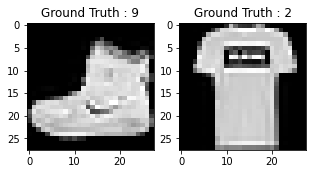

In [26]:
# Display the first image in training data
plt.figure(figsize=[5,5])
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap = 'gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(train_X[1,:,:], cmap = 'gray')
plt.title("Ground Truth : {}".format(test_Y[1]))

In [27]:
# reshaping the data
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [28]:
# getting the pixel values between 0 and 1
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.0
test_X = test_X / 255.0

In [29]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [30]:
# creating validation set
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size = 0.2, random_state = 100)

In [31]:
# setting the batch size, epochs and number of classes
batch_size = 64
epochs = 20
num_classes = 10

In [32]:
# creating the network
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3), activation = 'linear', input_shape=(28,28,1), padding = 'same'))
fashion_model.add(LeakyReLU(alpha = 0.1))
fashion_model.add(MaxPooling2D((2, 2), padding = 'same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear', padding = 'same'))
fashion_model.add(LeakyReLU(alpha = 0.1))
fashion_model.add(MaxPooling2D(pool_size = (2, 2), padding = 'same'))
fashion_model.add(Conv2D(128, (3, 3), activation = 'linear', padding = 'same'))
fashion_model.add(LeakyReLU(alpha = 0.1))                  
fashion_model.add(MaxPooling2D(pool_size = (2, 2), padding = 'same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation = 'linear'))
fashion_model.add(LeakyReLU(alpha = 0.1))                  
fashion_model.add(Dense(num_classes, activation = 'softmax'))

In [33]:
# compiling the model
fashion_model.compile(loss = tensorflow.keras.losses.categorical_crossentropy, optimizer = tensorflow.keras.optimizers.Adam(), metrics = ['accuracy'])

In [34]:
fashion_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 7, 7, 128)        

In [39]:
# training the model
fashion_train = fashion_model.fit(train_X, train_label, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data = (valid_X, valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 185s 4ms/sample - loss: 0.4669 - accuracy: 0.8303 - val_loss: 0.3055 - val_accuracy: 0.8848
Epoch 2/20
48000/48000 [==============================] - 182s 4ms/sample - loss: 0.2912 - accuracy: 0.8930 - val_loss: 0.2650 - val_accuracy: 0.9019
Epoch 3/20
48000/48000 [==============================] - 180s 4ms/sample - loss: 0.2462 - accuracy: 0.9107 - val_loss: 0.2487 - val_accuracy: 0.9068
Epoch 4/20
48000/48000 [==============================] - 184s 4ms/sample - loss: 0.2103 - accuracy: 0.9224 - val_loss: 0.2445 - val_accuracy: 0.9107
Epoch 5/20
48000/48000 [==============================] - 822s 17ms/sample - loss: 0.1854 - accuracy: 0.9305 - val_loss: 0.2195 - val_accuracy: 0.9195
Epoch 6/20
48000/48000 [==============================] - 181s 4ms/sample - loss: 0.1622 - accuracy: 0.9405 - val_loss: 0.2199 - val_accuracy: 0.9204
Epoch 7/20
48000/48000 [=========================

In [44]:
# model evaluation
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose = False)
print('Test accuracy:', test_eval[1])

Test accuracy: 0.9174


In [ ]:
# Try to improve the accuracy of the above model by hyper parameter tuning and adding / removing / updating layers. 
# (try wider and deeper models)

In [35]:
# Model
model = Sequential()
# Add convolution 2D
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal',input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2)))
# Add dropouts to the model
model.add(Dropout(0.25))
model.add(Conv2D(64,kernel_size=(3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add dropouts to the model
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
# Add dropouts to the model
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
# Add dropouts to the model
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

In [37]:
model.compile(loss=tensorflow.keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 3, 3, 128)        

In [38]:
# training the model
train = model.fit(train_X, train_label, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data = (valid_X, valid_label))



Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 127s 3ms/sample - loss: 0.7118 - accuracy: 0.7340 - val_loss: 0.4278 - val_accuracy: 0.8458
Epoch 2/20
48000/48000 [==============================] - 127s 3ms/sample - loss: 0.4504 - accuracy: 0.8352 - val_loss: 0.3386 - val_accuracy: 0.8740
Epoch 3/20
48000/48000 [==============================] - 126s 3ms/sample - loss: 0.3923 - accuracy: 0.8576 - val_loss: 0.3152 - val_accuracy: 0.8846
Epoch 4/20
48000/48000 [==============================] - 130s 3ms/sample - loss: 0.3567 - accuracy: 0.8699 - val_loss: 0.2810 - val_accuracy: 0.8963
Epoch 5/20
48000/48000 [==============================] - 128s 3ms/sample - loss: 0.3307 - accuracy: 0.8791 - val_loss: 0.2638 - val_accuracy: 0.9011
Epoch 6/20
48000/48000 [==============================] - 125s 3ms/sample - loss: 0.3135 - accuracy: 0.8865 - val_loss: 0.2584 - val_accuracy: 0.9040
Epoch 7/20
48000/48000 [==========================

In [43]:
test_eva = model.evaluate(test_X, test_Y_one_hot, verbose = False)
print('Test accuracy:', test_eva[1])

Test accuracy: 0.9113


In [45]:
model1 = Sequential()
model1.add(Conv2D(32, kernel_size=(3, 3), activation = 'relu', input_shape=(28,28,1), padding = 'same'))
model1.add(LeakyReLU(alpha = 0.1))
model1.add(MaxPooling2D((2, 2), padding = 'same'))
model1.add(Conv2D(64, (3, 3), activation='linear', padding = 'same'))
model1.add(LeakyReLU(alpha = 0.1))
model1.add(MaxPooling2D(pool_size = (2, 2), padding = 'same'))
model1.add(Conv2D(128, (3, 3), activation = 'linear', padding = 'same'))
model1.add(LeakyReLU(alpha = 0.1))                  
model1.add(MaxPooling2D(pool_size = (2, 2), padding = 'same'))
model1.add(Conv2D(128, (3, 3), activation = 'linear', padding = 'same'))
model1.add(LeakyReLU(alpha = 0.1))                  
model1.add(MaxPooling2D(pool_size = (2, 2), padding = 'same'))
model1.add(Flatten())
model1.add(Dense(128, activation = 'linear'))
model1.add(LeakyReLU(alpha = 0.1))                  
model1.add(Dense(num_classes, activation = 'softmax'))



In [46]:
model1.compile(loss=tensorflow.keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])

In [47]:
# training the model
train_1 = model1.fit(train_X, train_label, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data = (valid_X, valid_label))



Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 216s 5ms/sample - loss: 0.4999 - accuracy: 0.8167 - val_loss: 0.3240 - val_accuracy: 0.8774
Epoch 2/20
48000/48000 [==============================] - 220s 5ms/sample - loss: 0.2949 - accuracy: 0.8921 - val_loss: 0.2835 - val_accuracy: 0.8961
Epoch 3/20
48000/48000 [==============================] - 222s 5ms/sample - loss: 0.2458 - accuracy: 0.9091 - val_loss: 0.2442 - val_accuracy: 0.9062
Epoch 4/20
48000/48000 [==============================] - 218s 5ms/sample - loss: 0.2136 - accuracy: 0.9210 - val_loss: 0.2321 - val_accuracy: 0.9122
Epoch 5/20
48000/48000 [==============================] - 219s 5ms/sample - loss: 0.1855 - accuracy: 0.9294 - val_loss: 0.2377 - val_accuracy: 0.9146
Epoch 6/20
44864/48000 [===========================>..] - ETA: 13s - loss: 0.1609 - accuracy: 0.9396

KeyboardInterrupt: 

In [ ]:
test_eva1 = model1.evaluate(test_X, test_Y_one_hot, verbose = False)
print('Test accuracy:', test_eva1[1])

### Hyperparameter tuning

In [50]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

/Users/shreyahunur/opt/anaconda3/envs/Python/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  """Entry point for launching an IPython kernel.


In [55]:
def build_model(hp):  
    model = tensorflow.keras.Sequential([
    tensorflow.keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        # Sets minimum and max values of filters from 32 to 128
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(28,28,1)
    ),
    tensorflow.keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    tensorflow.keras.layers.Flatten(),
    tensorflow.keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    tensorflow.keras.layers.Dense(10, activation='softmax')
  ])
    
    model.compile(optimizer=tensorflow.keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    
    return model

In [56]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output',project_name="Mnist Fashion")

# Random Search will tell which parameter is best for Keras tuning

In [73]:
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [74]:
train_X_new=train_X/255.0
test_X_new=test_X/255.0

In [75]:
train_X_new[0].shape

(28, 28)

In [76]:
train_X_new=train_X_new.reshape(len(train_X_new),28,28,1)
test_X_new=test_X_new.reshape(len(test_X_new),28,28,1)

In [78]:
tuner_search.search(train_X_new, train_Y,epochs=3,validation_split=0.1)


Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
64                |?                 |conv_1_filter
5                 |?                 |conv_1_kernel
32                |?                 |conv_2_filter
5                 |?                 |conv_2_kernel
112               |?                 |dense_1_units
0.001             |?                 |learning_rate

Train on 54000 samples, validate on 6000 samples
Epoch 1/3
54000/54000 [==============================] - 283s 5ms/sample - loss: 0.4164 - accuracy: 0.8498 - val_loss: 0.3080 - val_accuracy: 0.8862
Epoch 2/3
48288/54000 [=========================>....] - ETA: 29s - loss: 0.2790 - accuracy: 0.8967

KeyboardInterrupt: 

In [ ]:
model2=tuner_search.get_best_models(num_models=1)[0]

In [ ]:
model2.summary()

In [ ]:
model2.fit(train_images, train_labels, epochs=10, validation_split=0.1, initial_epoch=3)

In [ ]:
test_eva2 = model2.evaluate(test_X_new, test_Y, verbose = False)
print('Test accuracy:', test_eva2[1])

References:

https://www.analyticsvidhya.com/blog/2021/05/convolutional-neural-networks-cnn/#h2_6

https://www.analyticsvidhya.com/blog/2020/02/cnn-vs-rnn-vs-mlp-analyzing-3-types-of-neural-networks-in-deep-learning/

https://deepai.org/machine-learning-glossary-and-terms/stride

https://serverguy.com/comparison/cpu-vs-gpu-vs-tpu/

https://towardsdatascience.com/simple-introduction-to-convolutional-neural-networks-cdf8d3077bac
